# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project 2: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file = "./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Import needed package, to enable tab hint in the following block
# The current version numpy may generate some warning, it's safetly to ignore

import numpy as np
import pandas as pd

/home/willwywang/miniconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
labels_df = pd.read_csv("signnames.csv")
# Convert Dataframe into numpy
labels_np = labels_df.values
# Only keep the Description column
labels = labels_np[:,1]
n_classes = len(labels)


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Mapping of index with description

In [4]:
labels_df

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### Import libary here

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

### Plot a random sign

Index of this image:  35
Description of this Index:  Ahead only


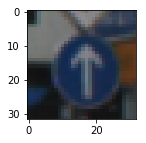

In [6]:

random_index = random.randint(0, n_train)
random_image = X_train[random_index]

# Set plotting size to 2*2
plt.figure(figsize=(2,2))
plt.imshow(random_image)
print("Index of this image: ", y_train[random_index])
print("Description of this Index: ", labels[y_train[random_index]])

### Count of each sign

In [7]:
# Calculate the sign set in train data: sign_set_train
# Calculate the first index of each sign in train data: first_index_train
# Calculate the count for each sign in train data: count_train
sign_set_train, first_index_train, count_train = np.unique(y_train, return_index=True, return_counts=True)

# Calculate the sign set in validation data: sign_set_train
# Calculate the first index of each sign in validation data: first_index_train
# Calculate the count for each sign in validation data: count_train
sign_set_valid, first_index_valid, count_valid = np.unique(y_valid, return_index=True, return_counts=True)

# Calculate the sign set in test data: sign_set_train
# Calculate the first index of each sign in test data: first_index_train
# Calculate the count for each sign in test data: count_train
sign_set_test, first_index_test, count_test = np.unique(y_test, return_index=True, return_counts=True)

### The bellow arrays show that all train/valid/test data have same number(43) of sign

In [8]:
sign_set_train

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [9]:
sign_set_valid

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [10]:
sign_set_test

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

### Plot the distribution of Train/Valid/Test data

Text(0.5,1,'Histogram for Train Data')

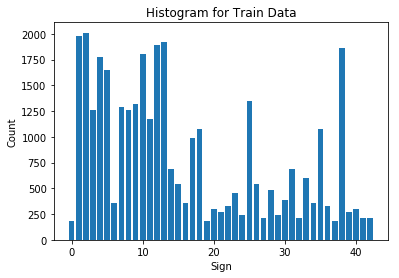

In [11]:
plt.bar(np.arange(43), count_train)
plt.xlabel('Sign')
plt.ylabel('Count')
plt.title('Histogram for Train Data')

Text(0.5,1,'Histogram for Valid Data')

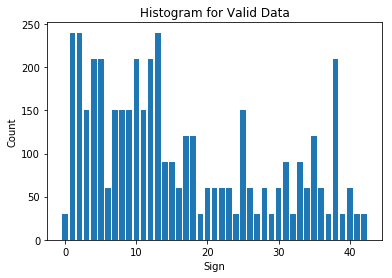

In [12]:
plt.bar(np.arange(43), count_valid)
plt.xlabel('Sign')
plt.ylabel('Count')
plt.title('Histogram for Valid Data')

Text(0.5,1,'Histogram for Test Data')

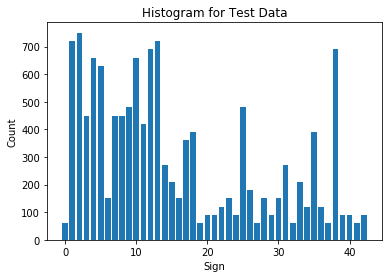

In [13]:
plt.bar(np.arange(43), count_test)
plt.xlabel('Sign')
plt.ylabel('Count')
plt.title('Histogram for Test Data')

### Plot each sign with description using the 101th occurance of it

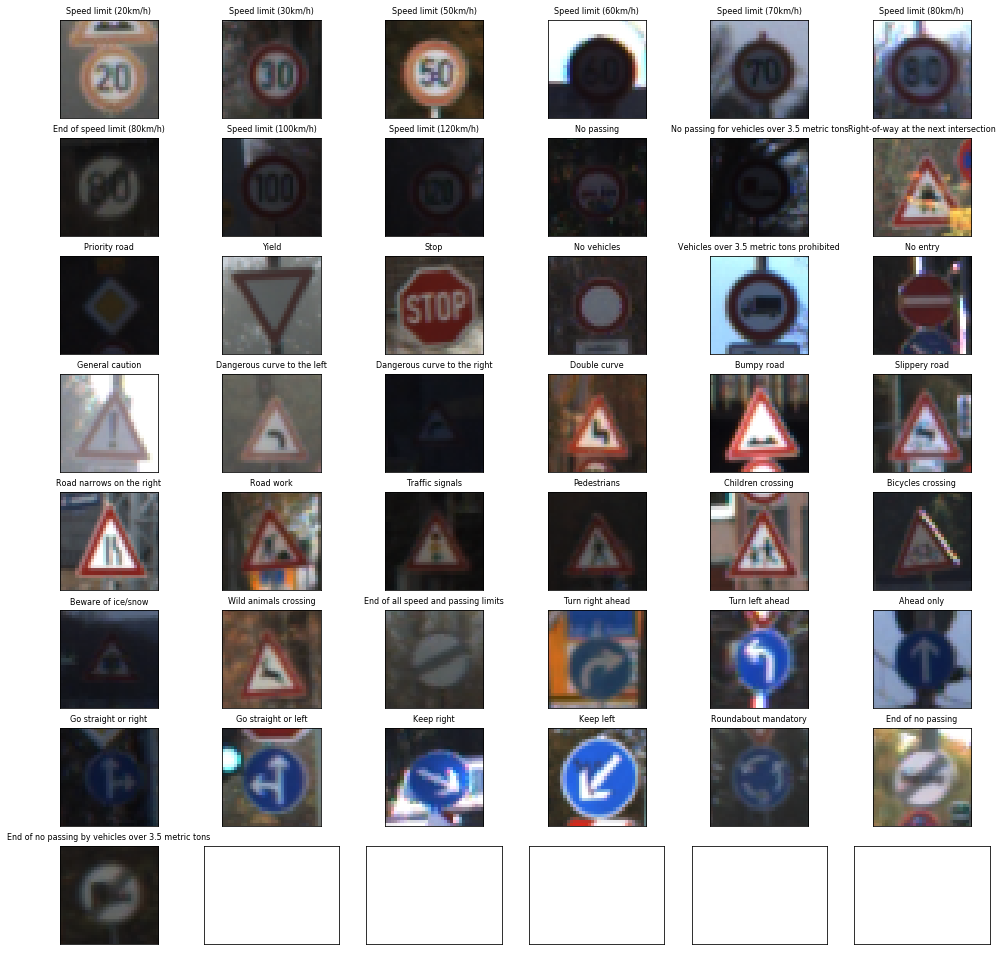

In [14]:
fig, axes = plt.subplots(8, 6, figsize=(17,17), subplot_kw={'xticks':[], 'yticks':[]})
for ax, i in zip(axes.flat, first_index_train):
    img = X_train[i+100]
    ax.imshow(img)
    ax.set_title("{}".format(labels[y_train[i+100]]), {"Fontsize":8})

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (`normalization`, `grayscale`, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [15]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### Generate some augmented data to expand training set

In [16]:
from keras.preprocessing.image import ImageDataGenerator
import cv2

/home/willwywang/miniconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/home/willwywang/miniconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/willwywang/miniconda3/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### First let's browser some sign before augmentation

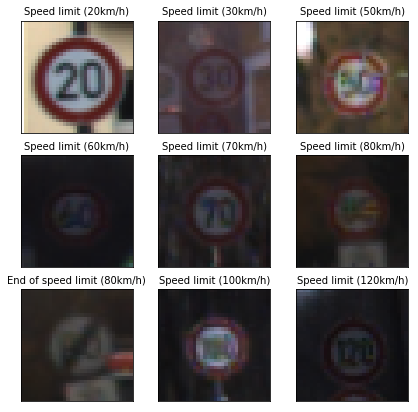

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(7,7), subplot_kw={'xticks':[], 'yticks':[]})
for ax, i in zip(axes.flat, first_index_train[:10]):
    img = X_train[i].astype('uint8')
    ax.imshow(img)
    ax.set_title("{}".format(labels[y_train[i]]), {"Fontsize":10})

### Then do the augmentation and browse the augmented sign

Processing Progress:  0
Processing Progress:  10000
Processing Progress:  20000
Processing Progress:  30000
Processing Progress:  40000
Processing Progress:  50000


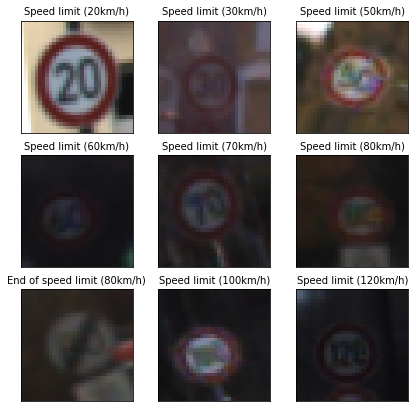

In [18]:
# Original data have 34799 sign pic, we add another 44799 augmented sign pic
augmentation_num = 50000
count = 0

datagen = ImageDataGenerator(rotation_range=20, 
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             fill_mode='nearest',
                             shear_range=0.1, 
                             zoom_range=0.1, 
                             horizontal_flip=False)
# Initialize array
X_train_augment = []
y_train_augment = []
X_train_aug = None
y_train_aug = None

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=10000, shuffle=False):
    print("Processing Progress: ", count)
    count += 10000
    if count > augmentation_num:
        break
    X_train_augment += X_batch.tolist()
    y_train_augment += y_batch.tolist()

X_train_aug = np.array(X_train_augment)
y_train_aug = np.array(y_train_augment)

# To free the memory
X_train_augment = []
y_train_augment = []

fig, axes = plt.subplots(3, 3, figsize=(7,7), subplot_kw={'xticks':[], 'yticks':[]})
for ax, i in zip(axes.flat, first_index_train[:10]):
    img = X_train_aug[i].astype('uint8')
    ax.imshow(img)
    ax.set_title("{}".format(labels[y_train_aug[i]]), {"Fontsize":10})

### Augmented data with motion blur

In [19]:
def motion_blur_aug(X):
    X_out = np.empty((X.shape)).astype('uint8')
    size = 4
    # generating the kernel
    kernel_motion_blur = np.zeros((size, size))
    kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
    kernel_motion_blur = kernel_motion_blur / size
    for idx, img in enumerate(X):
        X_out[idx] = cv2.filter2D(img, -1, kernel_motion_blur)
    return X_out   

X_train_aug_mb = motion_blur_aug(X_train)
y_train_aug_mb = y_train

### Sign before motion blur augmentation

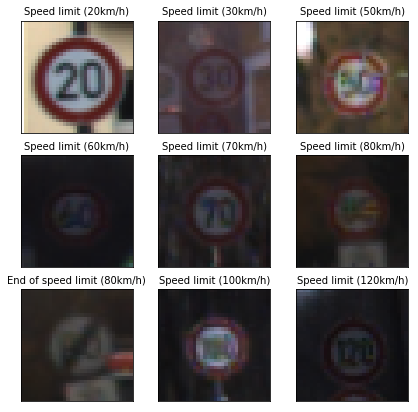

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(7,7), subplot_kw={'xticks':[], 'yticks':[]})
for ax, i in zip(axes.flat, first_index_train[:10]):
    img = X_train[i].astype('uint8')
    ax.imshow(img)
    ax.set_title("{}".format(labels[y_train[i]]), {"Fontsize":10})

### Sign after motion blur augmentation

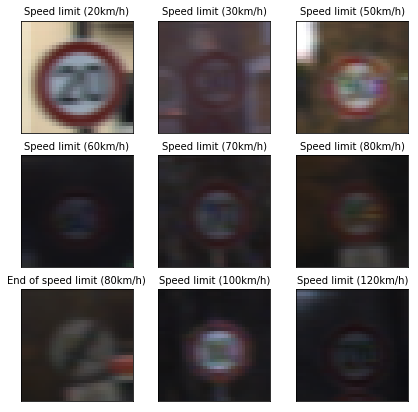

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(7,7), subplot_kw={'xticks':[], 'yticks':[]})
for ax, i in zip(axes.flat, first_index_train[:10]):
    img = X_train_aug_mb[i].astype('uint8')
    ax.imshow(img)
    ax.set_title("{}".format(labels[y_train_aug_mb[i]]), {"Fontsize":10})

### Normalization and grayscale

In [22]:
from skimage import exposure

In [23]:
def normalization_grayscale_each(image):
    tmp_image = cv2.cvtColor(image.astype('uint8'), (cv2.COLOR_BGR2YUV))[:, :, 0]
    tmp_image = (tmp_image / 255.).astype(np.float32)
    tmp_image = (exposure.equalize_adapthist(tmp_image,) - 0.5)
    tmp_image = tmp_image.reshape(tmp_image.shape + (1,))
    return tmp_image

def normalization_grayscale(images):
    print("Input shape: ", images.shape)
    processed_images = np.empty((images.shape[0], images.shape[1], images.shape[2], 1)).astype(np.float32)
    for index, image in enumerate(images):
        if index % 1000 == 1:
            print("Processing progress(index): ", index)
        processed_images[index] = normalization_grayscale_each(image)
    return processed_images

### Apply normalization and garyscale on `original` training data

In [24]:
X_train1 = normalization_grayscale(X_train)

Input shape:  (34799, 32, 32, 3)
Processing progress(index):  1


/home/willwywang/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Processing progress(index):  1001
Processing progress(index):  2001
Processing progress(index):  3001
Processing progress(index):  4001
Processing progress(index):  5001
Processing progress(index):  6001
Processing progress(index):  7001
Processing progress(index):  8001
Processing progress(index):  9001
Processing progress(index):  10001
Processing progress(index):  11001
Processing progress(index):  12001
Processing progress(index):  13001
Processing progress(index):  14001
Processing progress(index):  15001
Processing progress(index):  16001
Processing progress(index):  17001
Processing progress(index):  18001
Processing progress(index):  19001
Processing progress(index):  20001
Processing progress(index):  21001
Processing progress(index):  22001
Processing progress(index):  23001
Processing progress(index):  24001
Processing progress(index):  25001
Processing progress(index):  26001
Processing progress(index):  27001
Processing progress(index):  28001
Processing progress(index):  

### Apply normalization and garyscale on `keras augmented` training data

In [ ]:
X_train2 = normalization_grayscale(X_train_aug)

Input shape:  (44799, 32, 32, 3)
Processing progress(index):  1


/home/willwywang/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Processing progress(index):  1001
Processing progress(index):  15001
Processing progress(index):  16001
Processing progress(index):  17001
Processing progress(index):  18001
Processing progress(index):  19001
Processing progress(index):  20001
Processing progress(index):  21001
Processing progress(index):  22001
Processing progress(index):  23001
Processing progress(index):  24001
Processing progress(index):  25001
Processing progress(index):  26001
Processing progress(index):  27001
Processing progress(index):  28001
Processing progress(index):  29001
Processing progress(index):  30001
Processing progress(index):  31001
Processing progress(index):  32001
Processing progress(index):  33001
Processing progress(index):  34001
Processing progress(index):  35001
Processing progress(index):  36001
Processing progress(index):  37001
Processing progress(index):  38001
Processing progress(index):  39001


### Apply normalization and garyscale on `blur motion augmented` training data

In [26]:
X_train3 = normalization_grayscale(X_train_aug_mb)

Processing progress(index):  3001
Processing progress(index):  4001
Processing progress(index):  5001
Processing progress(index):  6001
Processing progress(index):  7001
Processing progress(index):  8001
Processing progress(index):  9001
Processing progress(index):  10001
Processing progress(index):  11001
Processing progress(index):  12001
Processing progress(index):  13001
Processing progress(index):  14001
Processing progress(index):  15001
Processing progress(index):  16001
Processing progress(index):  17001
Processing progress(index):  18001
Processing progress(index):  19001
Processing progress(index):  20001
Processing progress(index):  21001
Processing progress(index):  22001
Processing progress(index):  23001
Processing progress(index):  31001
Processing progress(index):  32001
Processing progress(index):  33001
Processing progress(index):  34001


### Apply normalization and garyscale on `validation` data

In [27]:
X_valid_p = normalization_grayscale(X_valid)

Input shape:  (4410, 32, 32, 3)
Processing progress(index):  1


/home/willwywang/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Processing progress(index):  1001
Processing progress(index):  2001
Processing progress(index):  3001
Processing progress(index):  4001


### Apply normalization and garyscale on `test` data

In [ ]:
X_test_p = normalization_grayscale(X_test)

Input shape:  (12630, 32, 32, 3)
Processing progress(index):  1


/home/willwywang/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Processing progress(index):  1001
Processing progress(index):  2001
Processing progress(index):  3001
Processing progress(index):  4001
Processing progress(index):  5001
Processing progress(index):  6001
Processing progress(index):  7001
Processing progress(index):  8001
Processing progress(index):  9001
Processing progress(index):  10001
Processing progress(index):  11001
Processing progress(index):  12001


### Draw `original sign`, `normalized sign`, `norm keras augmented sign`, `norm motion blur sign`

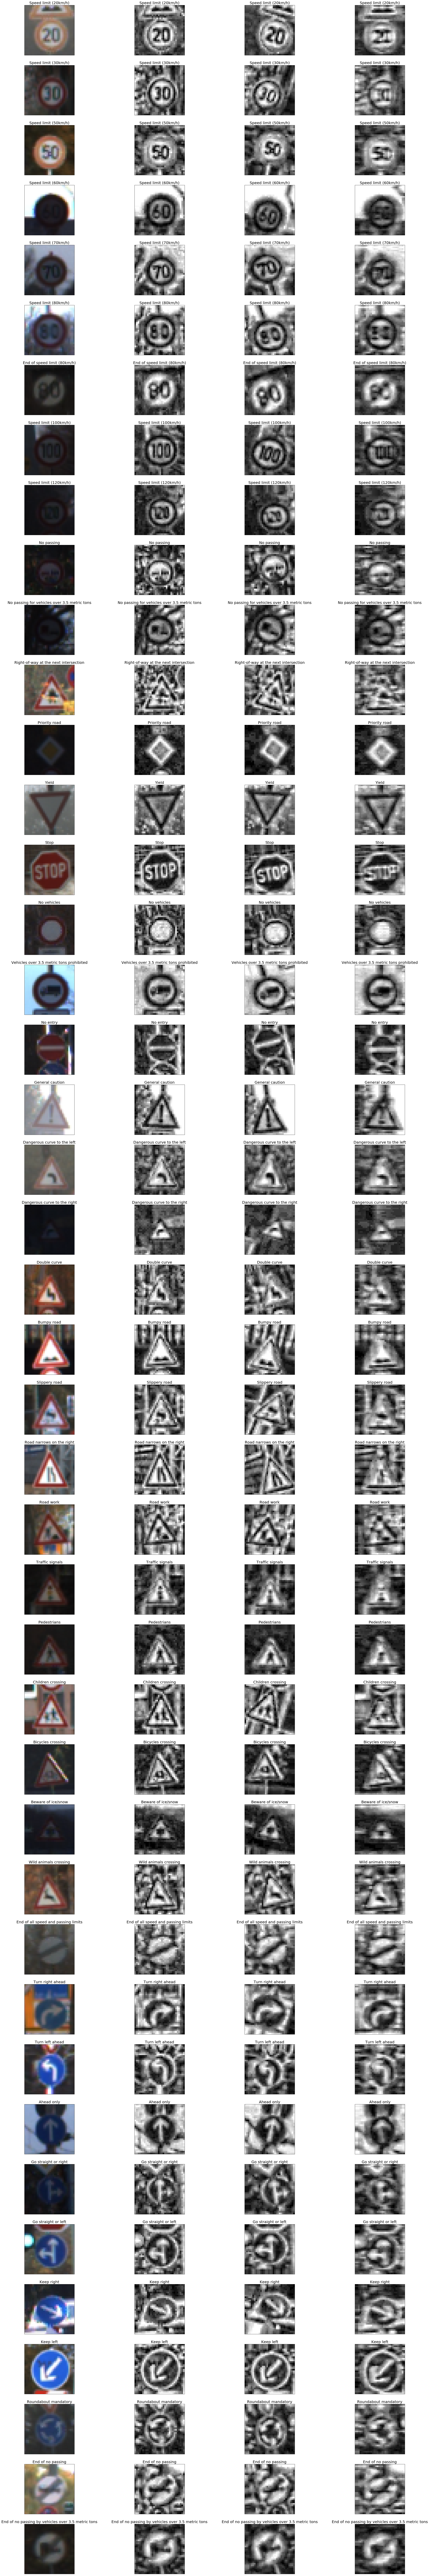

In [43]:
row_num = 43
col_num = 4

# Prepare the 
full_list = []
for idx in first_index_train:
    full_list.append(idx)
    full_list.append(idx)
    full_list.append(idx)
    full_list.append(idx)
full_list = np.array(full_list)

fig, axes = plt.subplots(row_num, col_num, figsize=(40,250), subplot_kw={'xticks':[], 'yticks':[]})
tmp_1 = 0
for ax, i in zip(axes.flat, full_list):
    if tmp_1 % 4 == 0:
        img1 = X_train[i+100].squeeze() # Squeeze is important here
        ax.imshow(img1)
    elif tmp_1 % 4 == 1:
        img1 = X_train1[i+100].squeeze()
        ax.imshow(img1, cmap='gray')
    elif tmp_1 % 4 == 2:
        img1 = X_train2[i+100].squeeze()
        ax.imshow(img1, cmap='gray')
    elif tmp_1 % 4 == 3:
        img1 = X_train3[i+100].squeeze()
        ax.imshow(img1, cmap='gray')
    tmp_1 += 1

    ax.set_title("{}".format(labels[y_train[i+100]]), {"Fontsize":20}) #TODO add original sample number

### Merge all training data together and shuffle them

In [ ]:
from sklearn.utils import shuffle

In [ ]:
# Unify name convension

y_train1 = y_train
y_train2 = y_train_aug
y_train3 = y_train_aug_mb

X_train_all = np.concatenate((X_train1, X_train2, X_train3), axis=0)
y_train_all = np.concatenate((y_train1, y_train2, y_train3), axis=0)

X_train_all, y_train_all = shuffle(X_train_all, y_train_all)

print("Original training set: ", X_train.shape)
print("Fianl training set: ", X_train_all.shape)

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [ ]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [ ]:
l1 = None
p1 = None
l2 = None
p2 = None

INPUT_CHANNELS=1
N_CLASSES=43

def LeNet(x):    
    global l1, p1, l2, p2
    mu = 0
    sigma = 0.1   
        
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x10.
    W1 = tf.Variable(tf.truncated_normal(shape=(5,5,INPUT_CHANNELS,10), mean = mu, stddev = sigma))
    b1 = tf.Variable(tf.zeros([10]))    
    l1 = tf.nn.conv2d(x, W1, [1,1,1,1], "VALID")
    l1 = tf.nn.bias_add(l1, b1)

    # Activation.
    l1 = tf.nn.relu(l1)

    # Pooling. Input = 28x28x10. Output = 14x14x10.
    p1 = tf.nn.max_pool(l1, [1,2,2,1], [1,2,2,1], "VALID")

    # Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5,5,10,16), mean = mu, stddev = sigma))
    b2 = tf.Variable(tf.zeros([16]))    
    l2 = tf.nn.conv2d(p1, W2, [1,1,1,1], "VALID") 
    l2 = tf.nn.bias_add(l2, b2)
    
    # Activation.
    l2 = tf.nn.relu(l2)    

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    p2 = tf.nn.max_pool(l2, [1,2,2,1], [1,2,2,1], "VALID")

    # Flatten. Input = 5x5x16. Output = 400.
    fl = tf.contrib.layers.flatten(p2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fl, fc1_W) + fc1_b     
    
    # Activation.
    fc1 = tf.nn.relu(fc1) 

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b 
    
    # Activation.
    fc2 = tf.nn.relu(fc2) 

    # Layer 5: Fully Connected. Input = 84. Output = N_CLASSES.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, N_CLASSES), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(N_CLASSES))
    
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

In [ ]:
EPOCHS = 10
BATCH_SIZE = 128

In [ ]:
x = tf.placeholder(tf.float32, (None, 32, 32, INPUT_CHANNELS))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, N_CLASSES)

In [ ]:
learning_rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

### Define the evaluation function

In [41]:
evaluate_operation = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(evaluate_operation, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the model and save it, and get the accuracy on Validation set is `0.964`

In [40]:
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Training")
    num_examples = len(X_train_all)
    for i in range(EPOCHS):
        print("Running epoch {} ...".format(i+1))

        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            x_batch, y_batch = X_train_all[offset:end], y_train_all[offset:end]
            sess.run(training_operation, feed_dict={x: x_batch, y: y_batch})
        
        print("X_train_all.shape",X_train_all.shape)
        print("y_train_all.shape",y_train_all.shape)
        accuracy = evaluate(X_train_all, y_train_all)
        print("Evaluated accuracy (train set): {:.3f}".format(accuracy))
        
        X_valid_p, y_valid = shuffle(X_valid_p, y_valid)
        print("X_valid_p.shape",X_valid_p.shape)
        print("y_valid.shape",y_valid.shape)
        accuracy = evaluate(X_valid_p, y_valid)
        print("Evaluated accuracy (validation set): {:.3f}".format(accuracy))
        
        X_test_p, y_test = shuffle(X_test_p, y_test)
        print("X_test_p.shape",X_test_p.shape)
        print("y_test.shape",y_test.shape)
        accuracy = evaluate(X_test_p, y_test)
        print("Evaluated accuracy (test set): {:.3f}".format(accuracy))
    
    print("Saving results")
    saver.save(sess, "./sess")

Training
Running epoch 1 ...
X_train_all.shape (114397, 32, 32, 1)
y_train_all.shape (114397,)
Evaluated accuracy (train set): 0.877
X_valid_p.shape (4410, 32, 32, 1)
y_valid.shape (4410,)
Evaluated accuracy (validation set): 0.914
X_test_p.shape (12630, 32, 32, 1)
y_test.shape (12630,)
Evaluated accuracy (test set): 0.879
Running epoch 2 ...
X_train_all.shape (114397, 32, 32, 1)
y_train_all.shape (114397,)
Evaluated accuracy (train set): 0.924
X_valid_p.shape (4410, 32, 32, 1)
y_valid.shape (4410,)
Evaluated accuracy (validation set): 0.939
X_test_p.shape (12630, 32, 32, 1)
y_test.shape (12630,)
Evaluated accuracy (test set): 0.910
Running epoch 3 ...
X_train_all.shape (114397, 32, 32, 1)
y_train_all.shape (114397,)
Evaluated accuracy (train set): 0.944
X_valid_p.shape (4410, 32, 32, 1)
y_valid.shape (4410,)
Evaluated accuracy (validation set): 0.943
X_test_p.shape (12630, 32, 32, 1)
y_test.shape (12630,)
Evaluated accuracy (test set): 0.914
Running epoch 4 ...
X_train_all.shape (1143

### Test model on test set, we get the final accuracy on test set is `0.947`

In [42]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'),)
    accuracy = evaluate(X_test_p, y_test)
    print("Final Evaluated accuracy (test set): {:.3f}".format(accuracy))

INFO:tensorflow:Restoring parameters from ./sess
Final Evaluated accuracy (test set): 0.947


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [107]:
from scipy.ndimage import imread

img_files =  ["web_images/31_wild_animal_crossing.png", 
              "web_images/4_speed_limit_70.png", 
              "web_images/13_yield.png", 
              "web_images/22_bumpy_road.png", 
              "web_images/14_stop.png",
              "web_images/38_keep_right.png"]
img_labels = [31, 4, 13, 22, 14, 38]
X_web_data = np.empty((len(img_files), 32, 32, 3), dtype = np.uint8)
y_web_data = np.empty((len(img_files),), dtype=np.uint8)



### Original sign from google image search

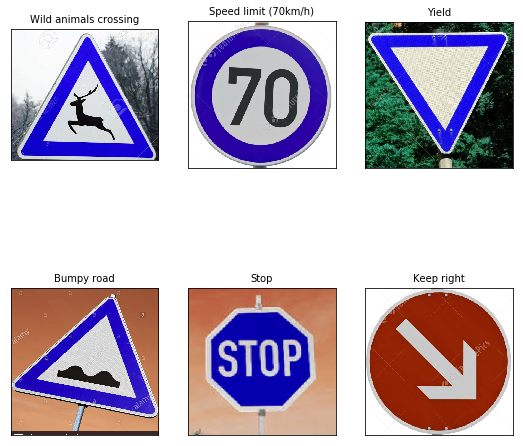

In [108]:
fig, axes = plt.subplots(2, 3, figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]})
tmp_2 = 0
for ax, file_name in zip(axes.flat, img_files):
    tmp_img = cv2.imread(file_name)
    tmp_idx = img_labels[tmp_2]
    ax.imshow(tmp_img)
    ax.set_title("{}".format(labels[tmp_idx]), {"Fontsize":10})
    tmp_2 += 1

### Convert web images into 32x32

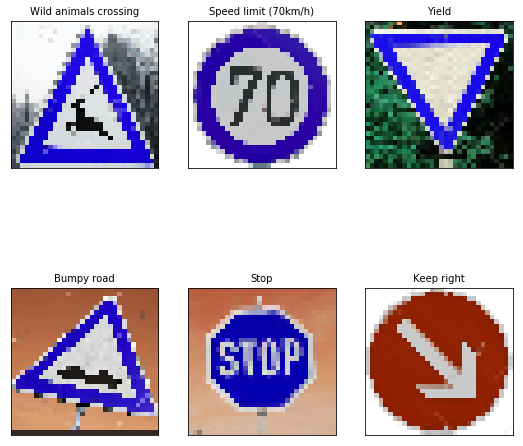

In [109]:
fig, axes = plt.subplots(2, 3, figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]})
tmp_2 = 0
for ax, file_name in zip(axes.flat, img_files):
    tmp_img = cv2.imread(file_name, cv2.COLOR_BGRA2RGB)
    tmp_img = cv2.resize(tmp_img, (32, 32))
    X_web_data[tmp_2] = tmp_img
    y_web_data[tmp_2] = img_labels[tmp_2]
    ax.imshow(X_web_data[tmp_2])
    ax.set_title("{}".format(labels[y_web_data[tmp_2]]), {"Fontsize":10})
    tmp_2 += 1

### Predict the Sign Type for Each Image

In [110]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

INFO:tensorflow:Restoring parameters from ./sess
Input shape:  (6, 32, 32, 3)
Processing progress(index):  1


/home/willwywang/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


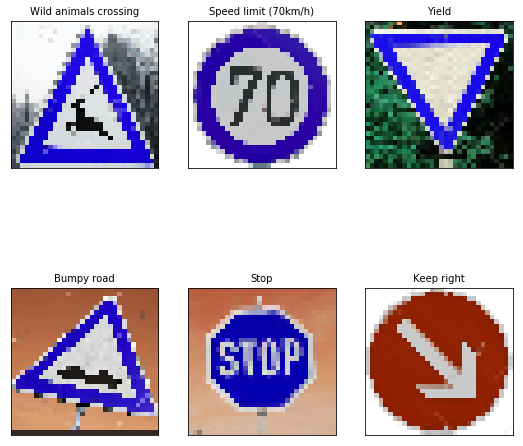

In [111]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predict = tf.argmax(logits, 1)
    pr = sess.run(predict, feed_dict = {x : normalization_grayscale(X_web_data), y : y_web_data})
        
    fig, axes = plt.subplots(2, 3, figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]})
    tmp_2 = 0
    for ax, file_name in zip(axes.flat, img_files):
        tmp_img = cv2.imread(file_name, cv2.COLOR_BGRA2RGB)
        tmp_img = cv2.resize(tmp_img, (32, 32))
        X_web_data[tmp_2] = tmp_img
        y_web_data[tmp_2] = img_labels[tmp_2]
        ax.imshow(X_web_data[tmp_2])
        ax.set_title("{}".format(labels[pr[tmp_2]]), {"Fontsize":10})
        tmp_2 += 1

### Analyze Performance

In [112]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [113]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'),)
    accuracy = evaluate(normalization_grayscale(X_web_data), y_web_data)
    print("Evaluated accuracy: {:.0f}%".format(accuracy * 100))

INFO:tensorflow:Restoring parameters from ./sess
Input shape:  (6, 32, 32, 3)
Processing progress(index):  1
Evaluated accuracy: 100%


/home/willwywang/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [114]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

Input shape:  (6, 32, 32, 3)
Processing progress(index):  1
INFO:tensorflow:Restoring parameters from ./sess


/home/willwywang/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


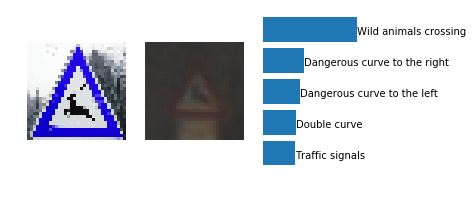

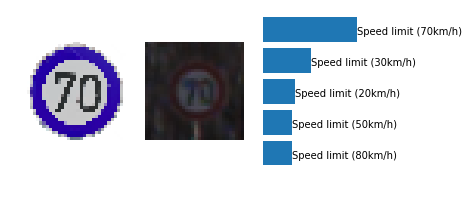

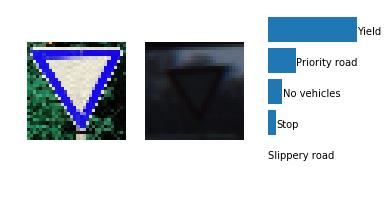

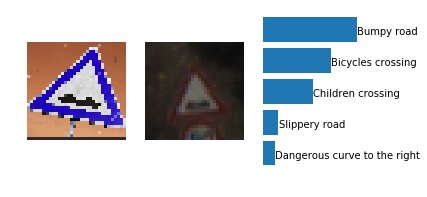

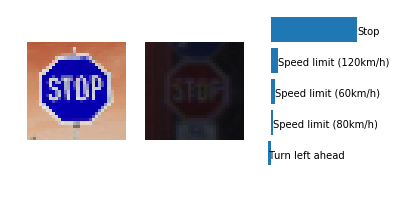

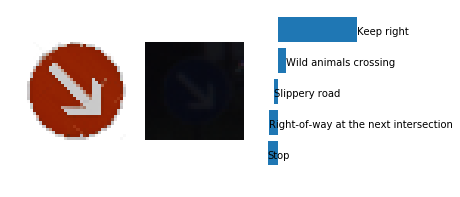

In [116]:
import matplotlib.gridspec as gridspec

feed_dict_new = feed_dict={x: normalization_grayscale(X_web_data), y: y_web_data}

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(logits, feed_dict = feed_dict_new)
    top5_prediction = sess.run([logits, tf.nn.top_k(logits, 5)], feed_dict=feed_dict_new)

for i in range(6):
    plt.figure(figsize = (6,3))
    gs = gridspec.GridSpec(1, 3)
    
    plt.subplot(gs[0])
    plt.axis('off')
    plt.imshow(X_web_data[i].squeeze())
    
    plt.subplot(gs[1])
    plt.imshow(X_train[first_index_train[top5_prediction[1][1][i][0]]].squeeze())
    plt.axis('off')
    
    plt.subplot(gs[2])
    plt.barh(6-np.arange(5),top5_prediction[1][0][i], align='center')
    for i_label in range(5):
        plt.text(top5_prediction[1][0][i][i_label] + .02,
                 6 - i_label - .15, 
                 labels[top5_prediction[1][1][i][i_label]])
    plt.axis('off')

    plt.show()